In [1]:
__version__ = '2021-09-20'
__authors__ = ['Robert Nikutta <robert.nikutta@gmail.com>', 'Enrique Lopez-Rodriguez', 'Kohei Ichikawa']

# Hypercat - Basics
This introductory notebook shows some of the basic functionality of the HYPERCAT software. Advanced topics are than explored in accompanying notebooks.

## Disclaimer and Attribution
HYPERCAT / CLUMPY models and the accompanyin software were published in two papers. If you decide to make use of either the models, the software, the example notebooks, or the included pupil images of telescopes included with HYPERCAT, please cite these two papers:

* **Nikutta, Lopez-Rodriguez, Ichikawa, Levenson, Packham, Hönig, Alonso-Herrero, "Hypercubes of AGN Tori (Hypercat) -- I. Models and Image Morphology", ApJ (2021, accepted)**

* **Nikutta, Lopez-Rodriguez, Ichikawa, Levenson, Packham, Hönig, Alonso-Herrero, "Hypercubes of AGN Tori (Hypercat) -- II. Resolving the
torus with Extremely Large Telescopes", ApJ (2021, under review)**


## Table of contents
* [Imports & setup](#import)
* [Loading a model hypercube](#load)
* [Your first image](#first)
* [A different model](#different)
* [Multiple wavelengths](#multiwave)
* [Multiple anything](#multiany)
* [Accessing cloud maps](#clouds)
* [Further information](#info)

<a class="anchor" id="import"></a>
## Imports and setup

In [2]:
import warnings
warnings.filterwarnings("ignore", message="dataset.value has been deprecated")
from itertools import product

%matplotlib inline

import hypercat as hc
from hypercat import plotting
print(hc.__version__)

0.1.5


<a class="anchor" id="load"></a>
## Loading a model hypercube

To create a model hypercube only the location of the hdf5 file is needed.

In [3]:
fname = 'hypercat_20200830_all.hdf5' # use your local location to the HDF5 model file (or a symlink)
cube = hc.ModelCube(fname,hypercube='imgdata')

Opening HDF5 file: hypercat_20200830_all.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'imgdata' [shape: (5,10,16,12,5,7,25,121,241)] to RAM (912.52 GB required) ...
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
 sig*    [ 15.000 -  75.000]  (  5)    15.000, 30.000, 45.000, 60.000, 75.000
   i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, ...
   Y*    [  5.000 -  20.000]  ( 16)     5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, 12.000, ...
   N*    [  1.000 -  12.000]  ( 12)     1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000,  8.000, ...
   q*    [  0.000 -   2.000]  (  5)     0.000,  0.500,  1.000,  1.500,  2.000
  tv*    [ 10.000 - 160.000]  (  7)    10.000, 20.000, 40.000, 60.000, 80.000,120.000,160.000
wave*    [  1.2

This didn't really load hundreds of GBs into your memory, but has simply memory-mapped the content of the HDF5 file.
The printed table lists the parameters/axes of the loaded hypercube `imgdata`, and the model parameter values each axis represents. All model images will be interplated in this 9-dimensional space. Note that only parameters with a `*` printed next to them are selectable by the user. `x` and `y` simply correspond to the image x and y axes, and will be interpolated implicitly (no need to worry about them, you will always receive the full image for all other parameters that you specify).

For a more detailed description of the CLUMPY torus model parameters, please see https://www.clumpy.org/model-description/index.html

<a class="anchor" id="first"></a>
## Your first image
To generate your first model image, you just need to pick a single location in the 9 dimensions spanned by the parameter axes for `sig, i, Y, N, q, tv` and `wave` paramaters, i.e. to construct a parameter vector. Please make sure that none of your values falls outside the range stored in the hypercube.
To then generate the model image, simple call the cube object with the parameter vector as argument.

In [4]:
vec1 = (40,85,20,4,0,20,10.0)  # thes are the values for: sig [degrees], i [degrees], Y, N, q, tv, wave [micron]
img1 = cube(vec1)

Loading a subcube of 14.2388 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.


We can now inspect what `img` is:

In [5]:
print("Shape:", img1.shape)
print("Sum of all values:", img1.sum())

Shape: (241, 241)
Sum of all values: 9.295261


Apparently `img` is a 2D array (an image) of size 242x241 pixels with floating point values. In this case, it is the brightness map of a CLUMPY torus with parameters:
- sigma = 40 degrees # torus angular height)
- i = 85 degrees (almost edge-on) # viewing angle
- Y = 20 # torus radial extent
- N = 4 # avg. number of clouds along radial ray in the equatorial plane
- q = 0 # radial cloud fall-off power-law exponent
- tv = 20 # optical depth of single cloud in the V band (0.55 micron)
- wave = 10.0 micron # wavelength

We can plot the image, for instance using a simple plotting helper function from Hypercat:

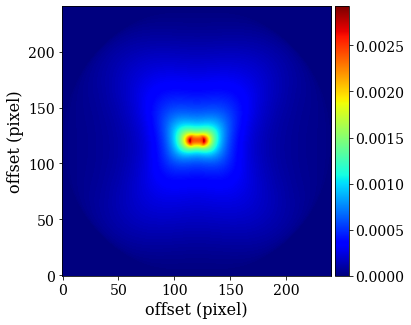

In [6]:
plotting.multiplot(img1,panelsize=6,cmaps='jet');

<a class="anchor" id="different"></a>
## A different model
To generate a model image with different parameters, simply provide a new parameter vector:

Loading a subcube of 14.2388 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.


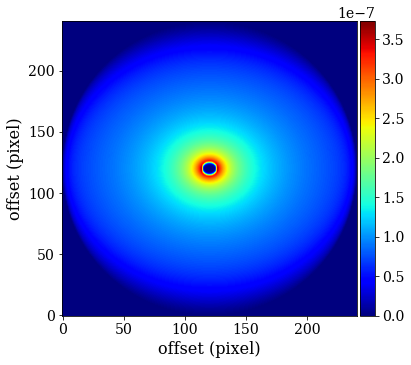

In [7]:
vec2 = (20,30,20,8,1,60,200.0)
img2 = cube(vec2)
plotting.multiplot(img2,panelsize=6,cmaps='jet');

We can also plot the images together:

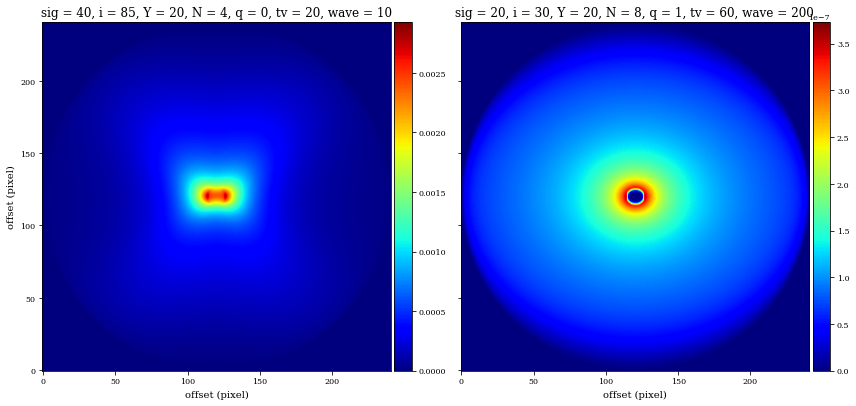

In [8]:
title = "sig = %g, i = %g, Y = %g, N = %g, q = %g, tv = %g, wave = %g"
titles = (title % vec1, title % vec2)
plotting.multiplot((img1,img2),panelsize=6,cmaps='jet',titles=titles,fontsize=10);

<a class="anchor" id="multiwave"></a>
## Multiple wavelengths
So far we saw the model interpolation with single value per parameter, but multi-valued entries per-parameter are allowed. We can use this for instance to quickly produce images of the same model but for several wavelengths.

In [9]:
wave = (4.8,10.0,53)
vec3 = (40,85,20,4,0,20,wave)
img3 = cube(vec3)
print("Shape:",img3.shape)

Loading a subcube of 113.91 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Shape: (3, 241, 241)


The result is a mini-cube holding 3 slices (images at the different wavelengths), each 241x241 pixels in size.

3


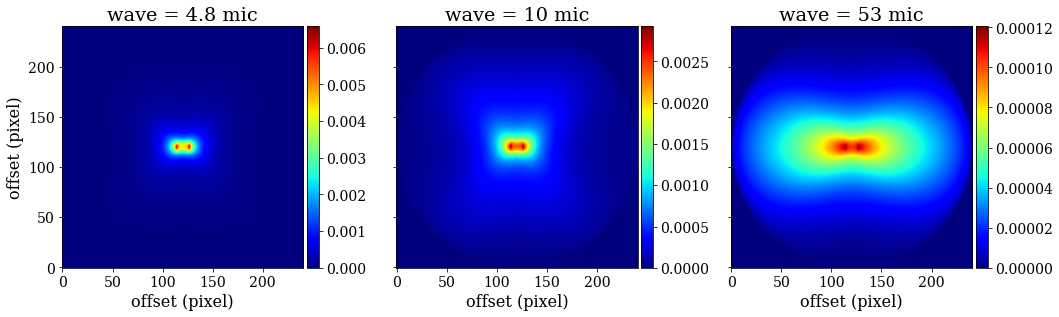

In [10]:
nslices = img3.shape[0]
print(nslices)
images = [img3[j,...] for j in range(nslices)]
plotting.multiplot(images,cmaps='jet',panelsize=5,titles=["wave = %g mic" % wave for wave in vec3[-1]]);

<a class="anchor" id="multiany"></a>
## Multiple anything
The multi-value capability is available for any of the free parameters. For instance, let's plot a model with changing `q` values, at 10 micron:

Loading a subcube of 35.5969 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.


/home/robert/dev/hypercat/hypercat/plotting.py:149: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(data,V,origin='lower',extent=extent,colors='w',linewidths=0.5,linestyles='-',corner_mask=True,norm=norm)


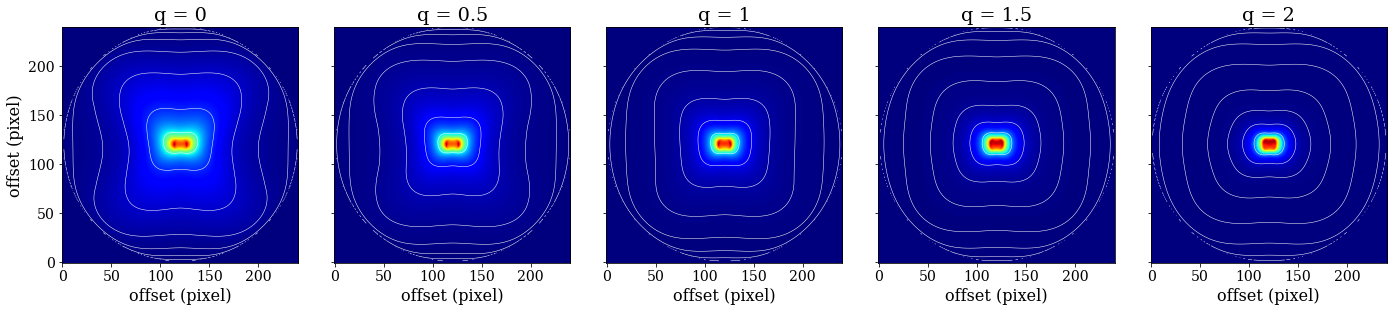

In [11]:
q = (0,0.5,1,1.5,2)
vec4 = (40,85,20,4,q,20,10)
img4 = cube(vec4)

nslices = img4.shape[0]
images = [img4[j,...] for j in range(nslices)]

# Let's also add countour lines
plotting.multiplot(images,cmaps='jet',panelsize=4,titles=["q = %g" % wave for wave in q],colorbars=None,contours='log');

Even multiple parameters can be multi-valued. Here for instance we plot a model at several values for `sig` (torus azimuthal thickness) and `i` (viewing angle) values:

In [12]:
sig = (15,45,75)
i = (0,30,60,90)
vec5 = (sig,i,20,4,0,20,10)
img5 = cube(vec5)
print(img5.shape)

Loading a subcube of 177.985 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
(3, 4, 241, 241)


The result is a hypercube with 3x4 slices (images) of 241x241 pixels each. Let's plot them:

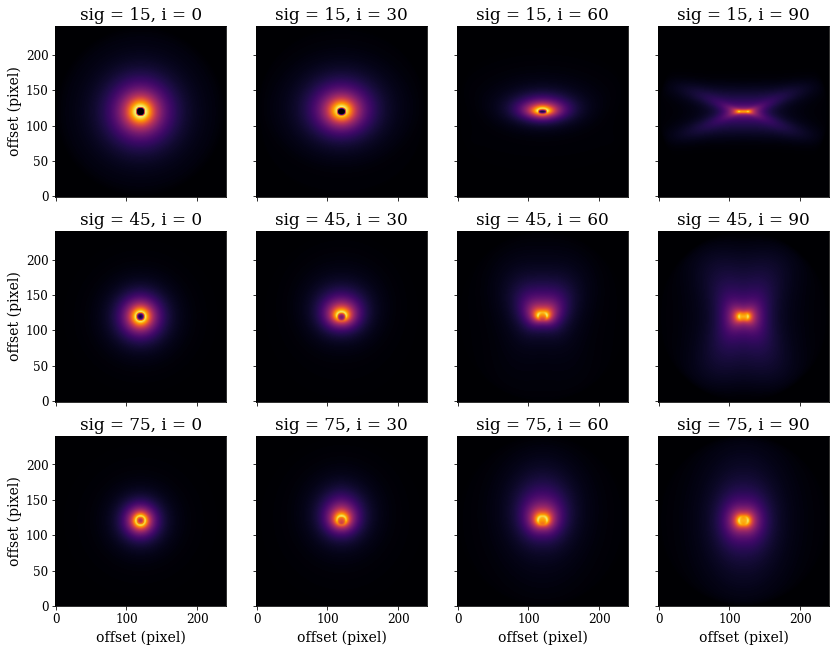

In [13]:
images = [img5[j,k,...] for j in range(len(sig)) for k in range(len(i))]
titles = ["sig = %g, i = %g" % pair for pair in product(sig,i)]
fig, axes = plotting.multiplot(images,geometry=(3,4),direction='y',
                               cmaps='inferno',panelsize=3,colorbars=None,titles=titles,\
                               sharex=True,sharey=True,fontsize=14)
fig.subplots_adjust(wspace=0.1,hspace=0.1)

<a class="anchor" id="clouds"></a>
## Accessing clouds maps
The HYPERCAT `hdf5` files also contain the projected 2D cloud maps for each model parameter vector. The pixel values in these maps encode how many dust clouds there are along the entire line of sight (LOS). Note that the number can be fractional -- it's the statistical mean over many possible realizations of the model.

In [14]:
fname = 'hypercat_20200830_all.hdf5' # same local location to the HDF5 model file
cube_clouds = hc.ModelCube(fname,hypercube='clddata') # note 'clddata' for 'cloud data', rather than 'imgdata' as before

Opening HDF5 file: hypercat_20200830_all.hdf5 
Loading sampling parameters.
Closing HDF5 file.
Loading  hypercube 'clddata' [shape: (5,10,16,5,121,241)] to RAM (444.96 MB required) ...
Inspect the loaded hypercube with .print_sampling()

-------------------------------------------------------
Parameter  Range                Nvalues  Sampled values
-------------------------------------------------------
sig*    [ 15.000 -  75.000]  (  5)    15.000, 30.000, 45.000, 60.000, 75.000
  i*    [  0.000 -  90.000]  ( 10)     0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000, ...
  Y*    [  5.000 -  20.000]  ( 16)     5.000,  6.000,  7.000,  8.000,  9.000, 10.000, 11.000, 12.000, ...
  q*    [  0.000 -   2.000]  (  5)     0.000,  0.500,  1.000,  1.500,  2.000
  x     [  0.000 - 120.000]  (121)     0.000,  1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000, ...
  y     [  0.000 - 240.000]  (241)     0.000,  1.000,  2.000,  3.000,  4.000,  5.000,  6.000,  7.000, ...
----------------

Observe that this hypercube of dust cloud maps is smaller: it has 6 dimensions (`imgdata` had 9), and the axes for optical depth `tv` and wavelength `wave` are missing -- the maps of how many clouds there are along a line of sight don't depend on optical depth and wavelength.

This entire cube was computed assuming `N_0 = 1` for the avg. number of clouds per radial ray in the equatorial plane. If you are investigating a model with a different `N_0`, simply multiply the dust map by `N_0`.

Let's compare a model's cloud distribution and emission morphology at a given wavelength:

Loading a subcube of 14.2388 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.
Loading a subcube of 1.77985 MB into RAM.
Squeezing all dim-1 axes...
Instantiating n-dim interpolation object ...
Done.


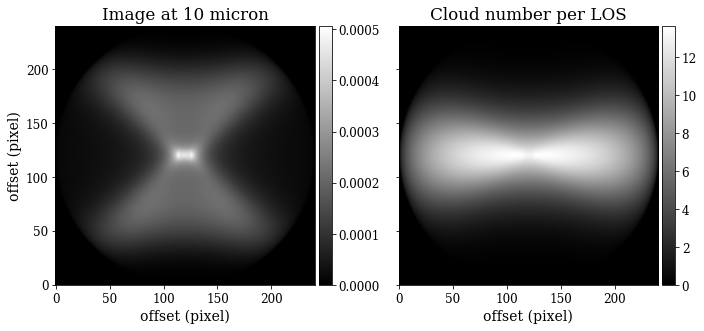

In [15]:
sig, i, Y, N, q, tv, wave = 30, 90, 20, 6.5, 0, 30, 10
vec_img = (sig,i,Y,N,q,tv,wave)
vec_cld = (sig,i,Y,q)
img = cube(vec_img)
cld = cube_clouds(vec_cld)

plotting.multiplot((img,cld*N),cmaps='gray',panelsize=5,fontsize=14,\
                    titles=('Image at %g micron' % wave,'Cloud number per LOS'));

<a class="anchor" id="info"></a>
## Further information
For a demonstration of other capabilities of HYPERCAT, please check out the various other notebooks in: https://github.com/rnikutta/hypercat/tree/master/examples/